# TIME SERIES ANALYSIS ON THE COVID-19 (CORONAVIRUS) CASES AND DEATHS IN THE WORLD VIA A FIXED DATASET(1 JAN 2020-20 MAR 2020) 

In [113]:
#importing relevant libraries
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import datetime
from datetime import datetime, timedelta

In [114]:
df_domain_tot=pd.DataFrame()
df_bar=pd.DataFrame(columns = ["Day", "Total_Domain"])
df_bar_tot=pd.DataFrame()
start = datetime(2020,3,27)
finish = datetime.now() + timedelta(hours=12)
totalday = finish-start
for i in range(totalday.days):  
    start_edit=start.strftime('%Y-%m-%d')
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{start_edit}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis
    df_domain = pd.DataFrame(df)
    df_domain_tot=df_domain_tot.append(df_domain)
    print('The new domain in {} is: {}, Total domain number is: {}'.format(start_edit,(df_domain.shape[0]),(df_domain_tot.shape[0])))
    df_bar['Day'], df_bar["Total_Domain"] = [[start_edit], [df_domain.shape[0]]]
    df_bar_tot=df_bar_tot.append(df_bar)
    start += timedelta(days=1)
print('Finish')

df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold', 'Country Code', 'Pop_Data.2018']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Geold',1,inplace=True)
df_domain.drop('Country Code',1,inplace=True)
df_domain['Populations']= df_domain['Pop_Data.2018']
df_domain.drop('Pop_Data.2018',1,inplace=True)
df= df_domain
df.head(10)

The new domain in 2020-03-27 is: 7125, Total domain number is: 7125
The new domain in 2020-03-28 is: 7320, Total domain number is: 14445
The new domain in 2020-03-29 is: 7515, Total domain number is: 21960
Finish


,Cases,Deaths,Countries and territories,Populations
dateRep,,,,
2020-03-29,15,1,Afghanistan,37172386.0
2020-03-28,16,1,Afghanistan,37172386.0
2020-03-27,0,0,Afghanistan,37172386.0
2020-03-26,33,0,Afghanistan,37172386.0
2020-03-25,2,0,Afghanistan,37172386.0
2020-03-24,6,1,Afghanistan,37172386.0
2020-03-23,10,0,Afghanistan,37172386.0
2020-03-22,0,0,Afghanistan,37172386.0
2020-03-21,2,0,Afghanistan,37172386.0


In [115]:
df.tail(10)

,Cases,Deaths,Countries and territories,Populations
dateRep,,,,
2020-03-19,2,0,Zambia,17351822.0
2020-03-29,2,0,Zimbabwe,14439018.0
2020-03-28,2,0,Zimbabwe,14439018.0
2020-03-27,0,0,Zimbabwe,14439018.0
2020-03-26,1,0,Zimbabwe,14439018.0
2020-03-25,0,0,Zimbabwe,14439018.0
2020-03-24,0,1,Zimbabwe,14439018.0
2020-03-23,0,0,Zimbabwe,14439018.0
2020-03-22,1,0,Zimbabwe,14439018.0


In [116]:
print(df.isnull().sum().sort_values(ascending=False)) #Let's find out the number of missing values in df and sort them down in descending order.

Populations                  11
Countries and territories     0
Deaths                        0
Cases                         0
dtype: int64


In [117]:
type(df.index[0]) #Checking the dates whether they are timestamp or not. 
print(df.index[0])

2020-03-29 00:00:00


In [118]:
df.info() #general overview on dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7515 entries, 2020-03-29 to 2020-03-21
Data columns (total 4 columns):
Cases                        7515 non-null int64
Deaths                       7515 non-null int64
Countries and territories    7515 non-null object
Populations                  7504 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 293.6+ KB


In [119]:
df.describe() #general descriptive statistics overview on dataset

,Cases,Deaths,Populations
count,7515.000000,7515.000000,7.504000e+03
mean,87.443779,4.052029,7.046491e+07
std,659.254504,38.319821,2.126148e+08
min,-9.000000,0.000000,1.000000e+03
25%,0.000000,0.000000,4.137309e+06
50%,0.000000,0.000000,1.072767e+07
75%,6.000000,0.000000,4.964868e+07
max,19979.000000,971.000000,1.392730e+09


In [120]:
df_World=df['2020-03-28'] #A snapshot for current date of  the world
df_World

,Cases,Deaths,Countries and territories,Populations
dateRep,,,,
2020-03-28,16,1,Afghanistan,37172386.0
2020-03-28,1,0,Angola,30809762.0
2020-03-28,12,3,Albania,2866376.0
2020-03-28,43,0,Andorra,77006.0
2020-03-28,0,0,Antigua_and_Barbuda,96286.0
2020-03-28,0,0,Algeria,42228429.0
2020-03-28,0,0,Anguilla,NaN
2020-03-28,101,5,Argentina,44494502.0
2020-03-28,43,0,Armenia,2951776.0


#### SNAPSHOT ON JANUARY 2020

In [121]:
df_jan2020=df['2020-01'] #A snapshot for the first month, January 2020
df_jan2020

,Cases,Deaths,Countries and territories,Populations
dateRep,,,,
2020-01-31,0,0,Afghanistan,37172386.0
2020-01-30,0,0,Afghanistan,37172386.0
2020-01-29,0,0,Afghanistan,37172386.0
2020-01-28,0,0,Afghanistan,37172386.0
2020-01-27,0,0,Afghanistan,37172386.0
2020-01-26,0,0,Afghanistan,37172386.0
2020-01-25,0,0,Afghanistan,37172386.0
2020-01-24,0,0,Afghanistan,37172386.0
2020-01-23,0,0,Afghanistan,37172386.0


In [122]:
total_cases_jan2020 = df_jan2020['Cases'].sum()
print(f"Total Covid-19 cases in January in the World:                            {total_cases_jan2020}")
total_deaths_jan2020 = df_jan2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in January in the World:              {total_deaths_jan2020}")

Total Covid-19 cases in January in the World:                            9799
Total deaths due to Covid-19 cases in January in the World:              213


In [123]:
avg_cases_jan2020 = df_jan2020['Cases'].mean()
print(f"Daily average Covid-19 cases in January in the World:                    {avg_cases_jan2020}")
avg_death_jan2020 = df_jan2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in January in the World:      {avg_death_jan2020}")

Daily average Covid-19 cases in January in the World:                    4.717862301396244
Daily average deaths due to Covid-19 cases in January in the World:      0.10255175734232065


#### SNAPSHOT ON FEBRUARY 2020

In [124]:
df_feb2020=df['2020-02'] #A snapshot for the second month, February 2020
df_feb2020

,Cases,Deaths,Countries and territories,Populations
dateRep,,,,
2020-02-29,0,0,Afghanistan,37172386.0
2020-02-28,0,0,Afghanistan,37172386.0
2020-02-27,0,0,Afghanistan,37172386.0
2020-02-26,0,0,Afghanistan,37172386.0
2020-02-25,1,0,Afghanistan,37172386.0
2020-02-24,0,0,Afghanistan,37172386.0
2020-02-23,0,0,Afghanistan,37172386.0
2020-02-22,0,0,Afghanistan,37172386.0
2020-02-21,0,0,Afghanistan,37172386.0


In [125]:
total_cases_feb2020 = df_feb2020['Cases'].sum()
print(f"Total Covid-19 cases in February in the World:                           {total_cases_feb2020}")
total_deaths_feb2020 = df_feb2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in February in the World:              {total_deaths_feb2020}")

Total Covid-19 cases in February in the World:                           75377
Total deaths due to Covid-19 cases in February in the World:              2708


In [126]:
avg_cases_feb2020=df_feb2020['Cases'].mean()
print(f"Daily average Covid-19 cases in February in the World:                    {avg_cases_feb2020}")
avg_death_feb2020=df_feb2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in February in the World:      {avg_death_feb2020}")

Daily average Covid-19 cases in February in the World:                    38.79413278435409
Daily average deaths due to Covid-19 cases in February in the World:      1.3937210499227999


#### SNAPSHOT ON MARCH 2020

In [127]:
df_mar2020=df['2020-03'] #A snapshot for the third month, March 2020
df_mar2020

,Cases,Deaths,Countries and territories,Populations
dateRep,,,,
2020-03-29,15,1,Afghanistan,37172386.0
2020-03-28,16,1,Afghanistan,37172386.0
2020-03-27,0,0,Afghanistan,37172386.0
2020-03-26,33,0,Afghanistan,37172386.0
2020-03-25,2,0,Afghanistan,37172386.0
2020-03-24,6,1,Afghanistan,37172386.0
2020-03-23,10,0,Afghanistan,37172386.0
2020-03-22,0,0,Afghanistan,37172386.0
2020-03-21,2,0,Afghanistan,37172386.0


In [128]:
total_cases_mar2020 = df_mar2020['Cases'].sum()
print(f"Total Covid-19 cases in March in the World:                           {total_cases_mar2020}")
total_deaths_mar2020 = df_mar2020['Deaths'].sum()
print(f"Total deaths due to Covid-19 cases in March in the World:              {total_deaths_mar2020}")

Total Covid-19 cases in March in the World:                           571937
Total deaths due to Covid-19 cases in March in the World:              27530


In [129]:
avg_cases_mar2020=df_mar2020['Cases'].mean()
print(f"Daily average Covid-19 cases in March in the World:                    {avg_cases_mar2020}")
avg_death_mar2020=df_mar2020['Deaths'].mean()
print(f"Daily average deaths due to Covid-19 cases in March in the World:      {avg_death_mar2020}")

Daily average Covid-19 cases in March in the World:                    166.84276546091016
Daily average deaths due to Covid-19 cases in March in the World:      8.030921820303384


### Plots and statistics with Time Series Analysis

#### WEEKLY(1JAN-20 MAR 2020)

In [130]:
df.Cases.resample("W").mean() #Weekly average of the Covid-19 Cases in 2020

dateRep
2020-01-05      0.146766
2020-01-12      0.000000
2020-01-19      0.341151
2020-01-26      3.846482
2020-02-02     26.718550
2020-02-09     49.036247
2020-02-16     67.618337
2020-02-23     20.356077
2020-03-01     17.509595
2020-03-08     50.133333
2020-03-15     76.542857
2020-03-22    144.374296
2020-03-29    265.562264
Freq: W-SUN, Name: Cases, dtype: float64

In [131]:
df.Deaths.resample("W").mean() #Weekly death average in 2020

dateRep
2020-01-05     0.000000
2020-01-12     0.002132
2020-01-19     0.004264
2020-01-26     0.113006
2020-02-02     0.530917
2020-02-09     1.083156
2020-02-16     1.825160
2020-02-23     1.692964
2020-03-01     1.100213
2020-03-08     1.616000
2020-03-15     3.657143
2020-03-22     6.735460
2020-03-29    13.215094
Freq: W-SUN, Name: Deaths, dtype: float64

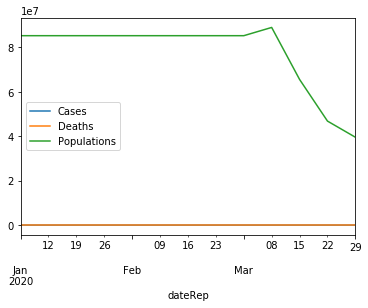

In [132]:
df.resample("W").mean().plot() #Line plot weekly basis both cases and deaths due to Covid-19

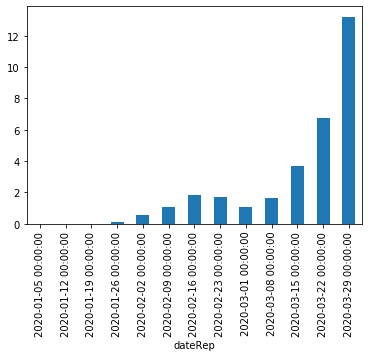

In [133]:
df.Deaths.resample("W").mean().plot(kind="bar")#Bar plot weekly just deaths column

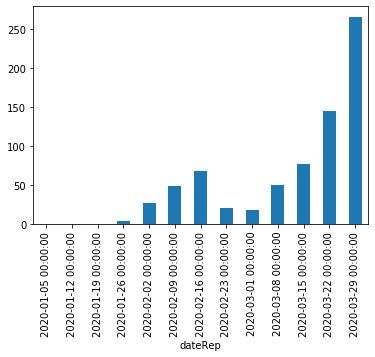

In [134]:
df.Cases.resample("W").mean().plot(kind='bar') #Bar plot weekly just deaths column

#### SPECIAL FOCUS ON MARCH
2020

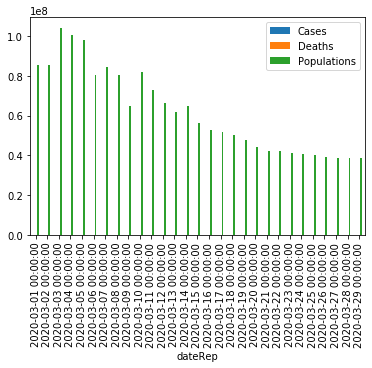

In [135]:
df['2020-03'].resample('D').mean().plot(kind='bar') #Daily basis both cases and deaths in bar plot in March 2020

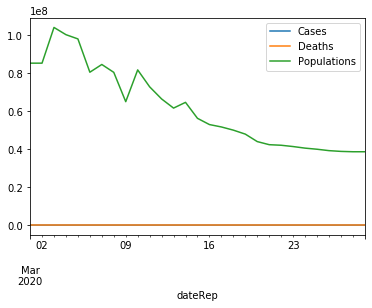

In [136]:
df['2020-03'].resample('D').mean().plot() #Daily basis both cases and deaths in line plot in March 2020

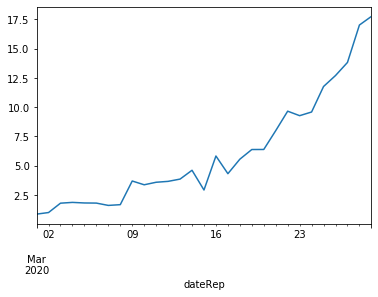

In [137]:
df['2020-03'].Deaths.resample("D").mean().plot() #Daily basis just cases in line plot in March 2020

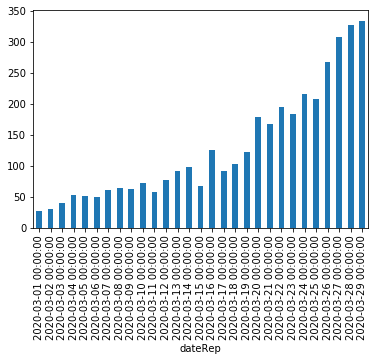

In [138]:
df['2020-03'].Cases.resample('D').mean().plot(kind='bar') #Daily basis just cases in bar plot in March 2020

In [139]:
%%html
<iframe src="https://experience.arcgis.com/experience/685d0ace521648f8a5beeeee1b9125cd?:display_count=y&:origin=viz_share_link" width="1400" height="1000">
</iframe>

In [86]:
%%html
<iframe src="https://www.worldometers.info/coronavirus/?:display_count=y&:origin=viz_share_link" width="1400" height="1000">
</iframe>

In [140]:
%%html
<iframe src="https://public.tableau.com/views/CoronakaartNederland/CoronakaartNederland?:display_count=y&:origin=viz_share_link" width="1400" height="1000">
</iframe>

In [112]:
%%html
<iframe src= "https://public.tableau.com/profile/randy.britsch#!/vizhome/Corona_15840702484460/CoronaActive?:display_count=y&:origin=viz_share_link" width="1400" height="1000">
</iframe>